In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline




In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
# Data cleaning and ensuring data consistency
df.rename(columns = {'TypeofContact': 'TypeOfContact'}, inplace = True)
df.Gender = df.Gender.str.replace("Fe Male", "Female")

In [7]:
# Check for features with missing values
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeOfContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Text(0.5, 1.0, 'Number Of Trips Distribution')

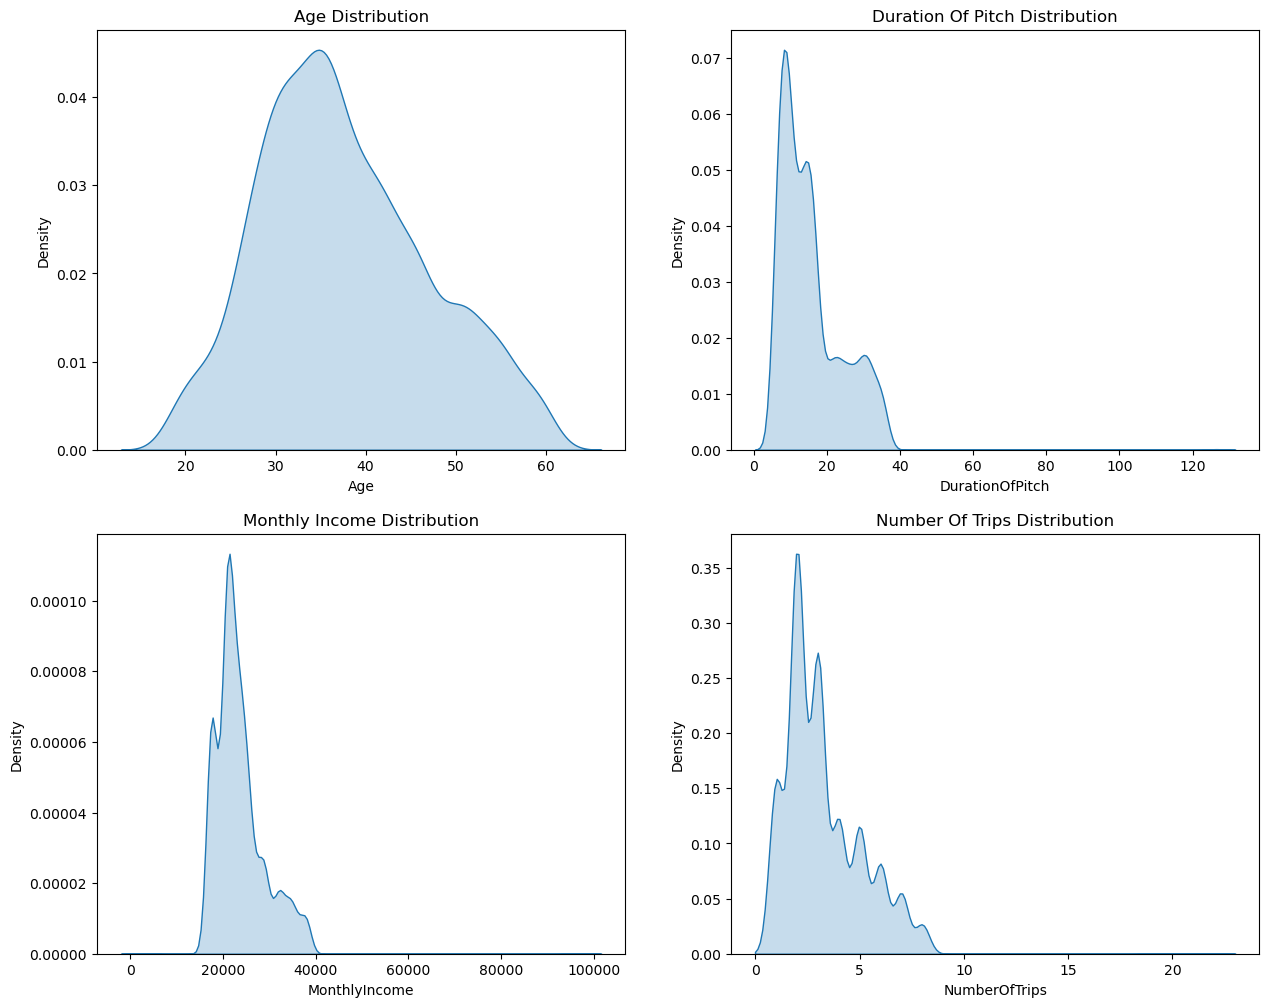

In [8]:
plt.figure(figsize = (15,12))
plt.subplot(2,2,1)
sns.kdeplot(df.Age, shade = True)
plt.title('Age Distribution')
plt.subplot(2,2,2)
sns.kdeplot(df.DurationOfPitch, shade = True)
plt.title('Duration Of Pitch Distribution')
plt.subplot(2,2,3)
sns.kdeplot(df.MonthlyIncome, shade = True)
plt.title('Monthly Income Distribution')
plt.subplot(2,2,4)
sns.kdeplot(df.NumberOfTrips, shade = True)
plt.title('Number Of Trips Distribution')


In [9]:
# From the graphs above, we see that those features are normally distributed, hence we can fill the missing values with the mean
# For the categorical features, we can fill the missing values with the mode
cols_with_na = ['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeOfContact']
for col in cols_with_na:
    if col in ['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
# Since the float columns contain integer values, we can convert them to integers
float_cols = df.select_dtypes(include = ['float64']).columns
for col in float_cols:
    df[col] = df[col].astype(int)

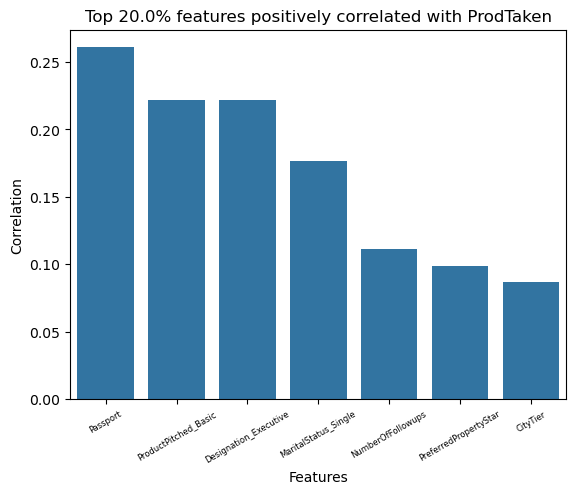

Passport                 0.260844
ProductPitched_Basic     0.221740
Designation_Executive    0.221740
MaritalStatus_Single     0.176496
NumberOfFollowups        0.111560
PreferredPropertyStar    0.098704
CityTier                 0.086852
Name: ProdTaken, dtype: float64

In [11]:
# We create a function to obtain the features with high positive correlation to the target variable 'ProdTaken' and visualise them in a bar chart
def get_top_positive_correlated_features(df,percentage):

    df_corr_analysis = pd.get_dummies(df, columns = ['TypeOfContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'])
    corr_sorted = df_corr_analysis.corr()['ProdTaken'].sort_values(ascending = True)
  
    num_of_cols_to_drop = int(percentage * len(corr_sorted))
    cols_to_drop = corr_sorted.iloc[:num_of_cols_to_drop].index
    df_corr_analysis.drop(columns = cols_to_drop, inplace = True)
    final_corr = df_corr_analysis.corr()['ProdTaken'].drop('ProdTaken').sort_values(ascending = False)

    
    sns.barplot(x = final_corr.index, y = final_corr.values)
    plt.xticks(rotation = 30, size = 6)
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.title(f'Top {(1-percentage)*100:.1f}% features positively correlated with ProdTaken')
    plt.show()
    return final_corr
get_top_positive_correlated_features(df, 0.8)

In [12]:
# We can see that the features 'Passport', 'ProductBasic', 'Executive' and 'SingleStatus' are highly correlated with the target variable 'ProdTaken'
# About 30% of those with Basic package or Executive designation took the product
# About 35% of those with Passport or are Single took the product
top_features = pd.DataFrame(
    {'Feature': ['Passport', 'ProductBasic', 'Executive', 'SingleStatus'],
    'Percentage of Product Taken': [round((df[(df.ProdTaken == 1) & (df.Passport == 1)]['ProdTaken'].count() / df[df.Passport == 1]['ProdTaken'].count())*100, 2),
    round((df[(df.ProdTaken == 1) & (df.ProductPitched == 'Basic')]['ProdTaken'].count() / df[df.ProductPitched == 'Basic']['ProdTaken'].count())*100, 2),
    round((df[(df.ProdTaken == 1) & (df.Designation == 'Executive')]['ProdTaken'].count() / df[df.Designation == 'Executive']['ProdTaken'].count())*100, 2),
    round((df[(df.ProdTaken == 1) & (df.MaritalStatus == 'Single')]['ProdTaken'].count() / df[df.MaritalStatus == 'Single']['ProdTaken'].count())*100, 2)]})

top_features

,Feature,Percentage of Product Taken
0,Passport,34.74
1,ProductBasic,29.97
2,Executive,29.97
3,SingleStatus,33.19


([<matplotlib.axis.XTick at 0x17590caa0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

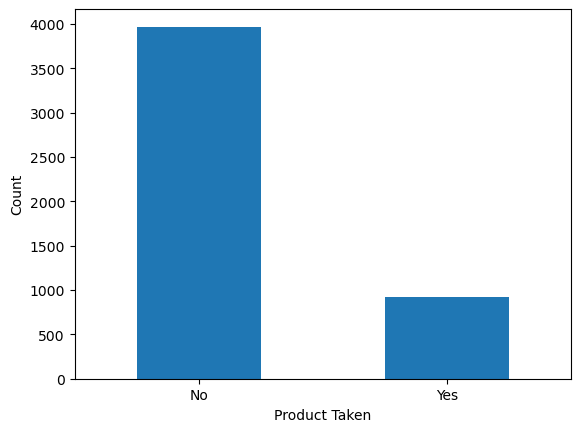

In [13]:
# We can observe that there is imbalanced data in the target variable 'ProdTaken'
df.ProdTaken.value_counts().plot(kind = 'bar', xlabel='Product Taken', ylabel='Count')
plt.xticks(rotation = 0, ticks = [0,1], labels = ['No', 'Yes'])


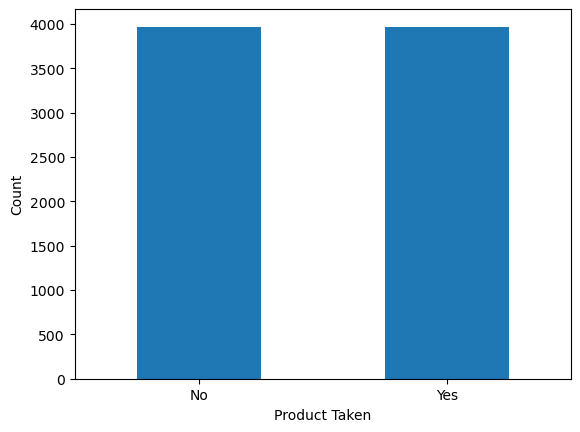

In [14]:
# We can balance the data by upsampling the minority class
df_majority = df[df.ProdTaken == 0]
df_minority = df[df.ProdTaken == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state = 42)
df_resampled = pd.concat([df_majority, df_minority_upsampled])
df_resampled.ProdTaken.value_counts().plot(kind = 'bar', xlabel='Product Taken', ylabel='Count')
plt.xticks(rotation = 0, ticks=[0,1], labels=['No', 'Yes'])
plt.show()

In [15]:
x = df_resampled.drop('ProdTaken', axis = 1)
y = df_resampled.ProdTaken

In [16]:
# Perform train test split to split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
# For features with 2 category values, we can use LabelEncoder to encode them, whereas for those with more than 2 category values, we can use OneHotEncoder to encode them
toc = LabelEncoder()
sex = LabelEncoder()
train_x.TypeOfContact = toc.fit_transform(train_x.TypeOfContact)
test_x.TypeOfContact = toc.transform(test_x.TypeOfContact)
train_x.Gender = sex.fit_transform(train_x.Gender)
test_x.Gender = sex.transform(test_x.Gender)

In [18]:
ohe = OneHotEncoder()
ct = ColumnTransformer(transformers = [('encoder', ohe, [5,9,11,17])], remainder = 'passthrough')
train_x_onehot = ct.fit_transform(train_x)
test_x_onehot = ct.transform(test_x)


In [19]:
# Obtaining the column names after encoding
encoded_columns = ct.named_transformers_['encoder'].get_feature_names_out()
remainder_columns = [col for i, col in enumerate(train_x.columns) if i not in [5, 9, 11, 17]]
final_columns = list(encoded_columns) + remainder_columns
final_columns

['Occupation_Free Lancer',
 'Occupation_Large Business',
 'Occupation_Salaried',
 'Occupation_Small Business',
 'ProductPitched_Basic',
 'ProductPitched_Deluxe',
 'ProductPitched_King',
 'ProductPitched_Standard',
 'ProductPitched_Super Deluxe',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Unmarried',
 'Designation_AVP',
 'Designation_Executive',
 'Designation_Manager',
 'Designation_Senior Manager',
 'Designation_VP',
 'CustomerID',
 'Age',
 'TypeOfContact',
 'CityTier',
 'DurationOfPitch',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [20]:
train_x_onehot_df = pd.DataFrame(train_x_onehot, columns = final_columns)
test_x_onehot_df = pd.DataFrame(test_x_onehot, columns = final_columns)

------------------------------------
LogisticRegression
Accuracy: 0.67
Recall: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       810
           1       0.67      0.65      0.66       778

    accuracy                           0.67      1588
   macro avg       0.67      0.67      0.67      1588
weighted avg       0.67      0.67      0.67      1588



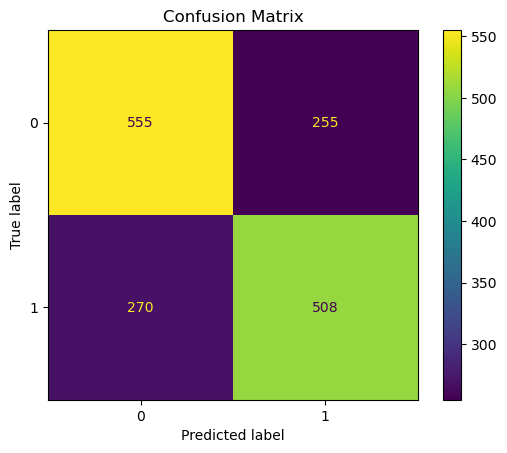

------------------------------------
------------------------------------
NaiveBayes
Accuracy: 0.68
Recall: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       810
           1       0.64      0.75      0.69       778

    accuracy                           0.68      1588
   macro avg       0.68      0.68      0.67      1588
weighted avg       0.68      0.68      0.67      1588



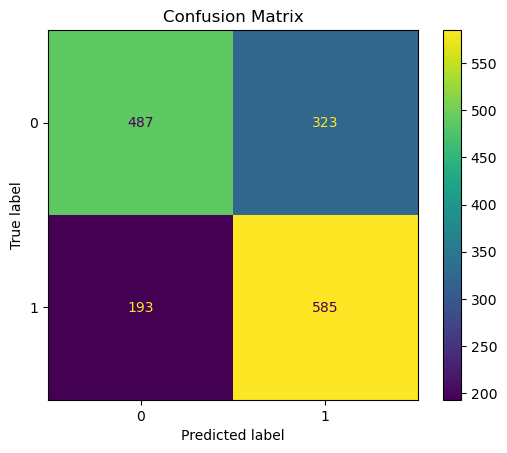

------------------------------------
------------------------------------
DecisionTree
Accuracy: 0.96
Recall: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       810
           1       0.93      0.99      0.96       778

    accuracy                           0.96      1588
   macro avg       0.96      0.96      0.96      1588
weighted avg       0.96      0.96      0.96      1588



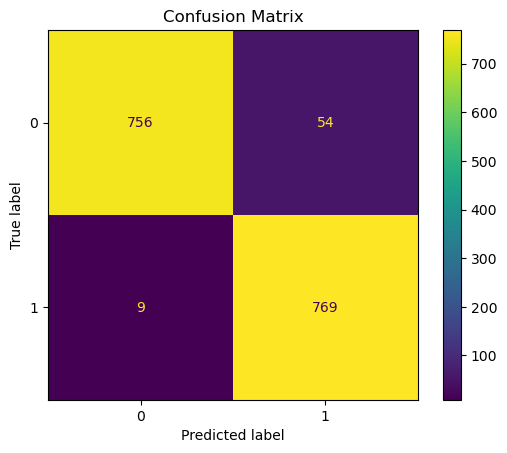

------------------------------------
------------------------------------
SupportVectorMachine
Accuracy: 0.55
Recall: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.24      0.35       810
           1       0.52      0.88      0.66       778

    accuracy                           0.55      1588
   macro avg       0.59      0.56      0.50      1588
weighted avg       0.59      0.55      0.50      1588



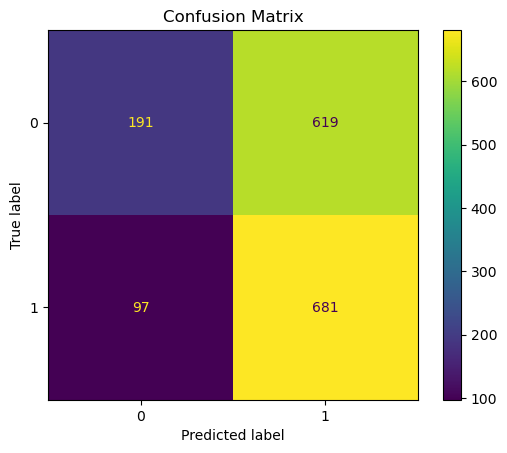

------------------------------------


In [21]:
# Model fitting and evaluation process
# We will focus more on the recall score as it is more important to reduce the number of false negatives (it is more costly to misclassify a customer who would have taken the product)
models = {
    'LogisticRegression': LogisticRegression(),
    'NaiveBayes': GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    'SupportVectorMachine': SVC(),

}
def model_fit(models):
    for model_name in models:
        model = models[model_name]
        model.fit(train_x_onehot_df, train_y)
        y_pred = model.predict(test_x_onehot_df)
        print('------------------------------------')
        print(model_name)
        print(f'Accuracy: {accuracy_score(test_y,y_pred):.2f}')
        print(f'Recall: {recall_score(test_y,y_pred):.2f}')
        print('Classification Report:')
        print(classification_report(test_y,y_pred))
        ConfusionMatrixDisplay(confusion_matrix(test_y,y_pred)).plot()
        plt.title("Confusion Matrix")
        plt.show()
        print('------------------------------------')
    
model_fit(models)

------------------------------------
RandomForest
Accuracy: 0.99
Recall: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       810
           1       0.98      0.99      0.99       778

    accuracy                           0.99      1588
   macro avg       0.99      0.99      0.99      1588
weighted avg       0.99      0.99      0.99      1588



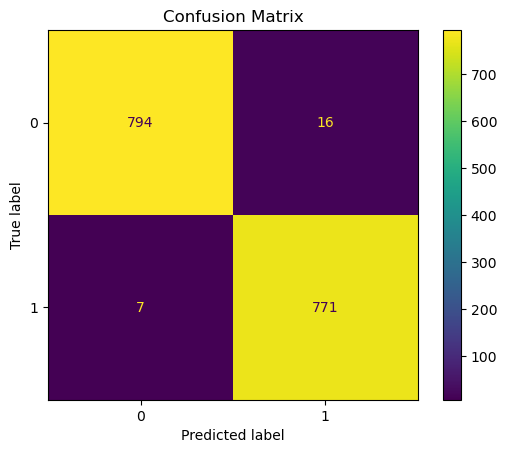

------------------------------------
------------------------------------
AdaBoost
Accuracy: 0.78
Recall: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       810
           1       0.78      0.77      0.77       778

    accuracy                           0.78      1588
   macro avg       0.78      0.78      0.78      1588
weighted avg       0.78      0.78      0.78      1588



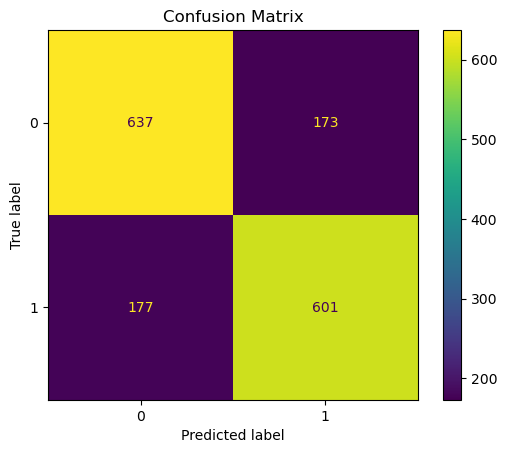

------------------------------------
------------------------------------
GradientBoost
Accuracy: 0.84
Recall: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       810
           1       0.85      0.81      0.83       778

    accuracy                           0.84      1588
   macro avg       0.84      0.83      0.83      1588
weighted avg       0.84      0.84      0.83      1588



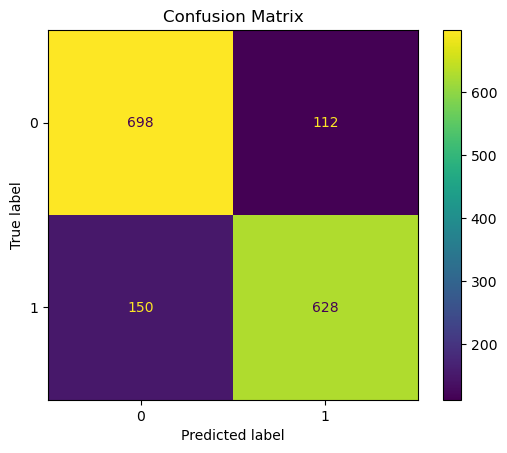

------------------------------------
------------------------------------
XGBoost
Accuracy: 0.98
Recall: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       810
           1       0.97      0.99      0.98       778

    accuracy                           0.98      1588
   macro avg       0.98      0.98      0.98      1588
weighted avg       0.98      0.98      0.98      1588



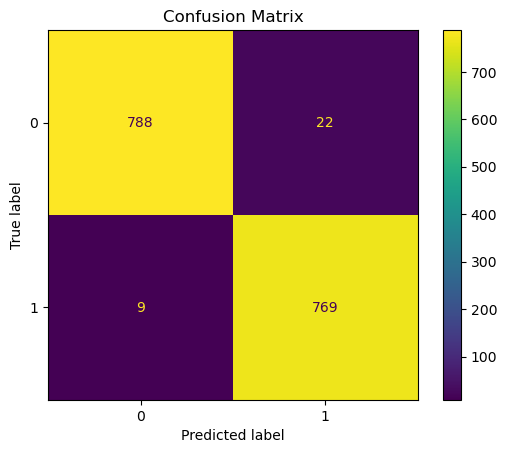

------------------------------------


In [22]:
# Trying out ensemble models like bagging and boosting
ensemble_models = {
    'RandomForest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

model_fit(ensemble_models)

In [23]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

xgboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'colsample_bylevel': [0.7, 0.8, 0.9],
    'colsample_bynode': [0.7, 0.8, 0.9]
}


In [24]:
models_for_tuning = [('DecisionTreeClassifier', DecisionTreeClassifier(), dt_param_grid),
                    ('RandomForestClassifier', RandomForestClassifier(), rf_param_grid),
                    ('XGBClassifier', XGBClassifier(), xgboost_param_grid)
]


------------------------------------
DecisionTreeClassifier with hyperparameter tuning
Accuracy: 0.94
Recall: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       810
           1       0.91      0.98      0.94       778

    accuracy                           0.94      1588
   macro avg       0.94      0.94      0.94      1588
weighted avg       0.94      0.94      0.94      1588



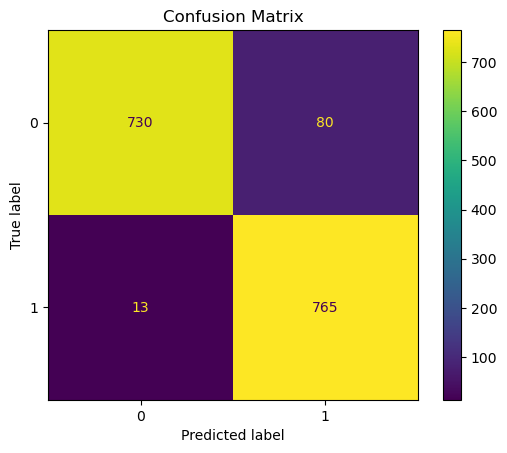

Best parameters for the DecisionTreeClassifier model:
{'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
------------------------------------
------------------------------------
RandomForestClassifier with hyperparameter tuning
Accuracy: 0.99
Recall: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       810
           1       0.98      0.99      0.99       778

    accuracy                           0.99      1588
   macro avg       0.99      0.99      0.99      1588
weighted avg       0.99      0.99      0.99      1588



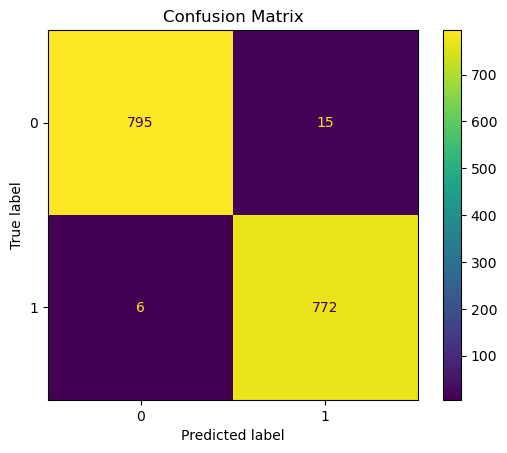

Best parameters for the RandomForestClassifier model:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
------------------------------------
------------------------------------
XGBClassifier with hyperparameter tuning
Accuracy: 0.98
Recall: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       810
           1       0.98      0.99      0.98       778

    accuracy                           0.98      1588
   macro avg       0.98      0.98      0.98      1588
weighted avg       0.98      0.98      0.98      1588



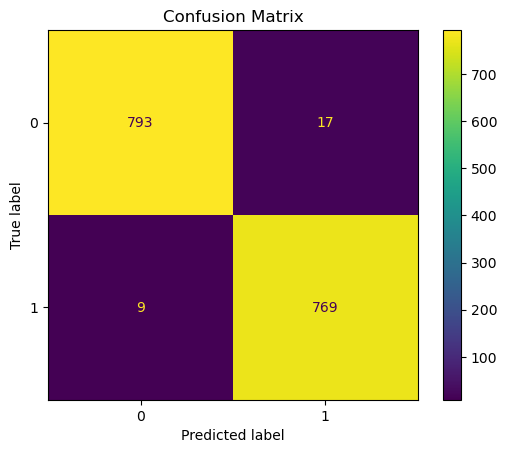

Best parameters for the XGBClassifier model:
{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.15, 'colsample_bytree': 0.7, 'colsample_bynode': 0.8, 'colsample_bylevel': 0.8}
------------------------------------


In [25]:
# Perform hyperparameter tuning on the models to get the best parameters so as to improve model performance
def hyperparameter_tuning(model_with_params):
    for i in model_with_params:
        name, model, param = i[0], i[1], i[2]
        randomized_search = RandomizedSearchCV(estimator = model, param_distributions = param, n_iter = 100, cv = 5, n_jobs = -1)
        randomized_search.fit(train_x_onehot_df, train_y)
        y_pred = randomized_search.predict(test_x_onehot_df)
        print('------------------------------------')
        print(f'{name} with hyperparameter tuning')
        print(f'Accuracy: {accuracy_score(test_y,y_pred):.2f}')
        print(f'Recall: {recall_score(test_y,y_pred):.2f}')
        print('Classification Report:')
        print(classification_report(test_y,y_pred))
        ConfusionMatrixDisplay(confusion_matrix(test_y,y_pred)).plot()
        plt.title("Confusion Matrix")
        plt.show()
        print(f'Best parameters for the {name} model:')
        print(randomized_search.best_params_)
        print('------------------------------------')
hyperparameter_tuning(models_for_tuning)